In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [37]:
datafile = pd.read_csv("/content/Heart Disease.csv")
datafile.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
datafile.info()
print(datafile.describe())
print(datafile.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            4240 non-null   object 
 1   age                               4240 non-null   int64  
 2   education                         4135 non-null   float64
 3   currentSmoker                     4240 non-null   int64  
 4   cigsPerDay                        4211 non-null   float64
 5   BPMeds                            4187 non-null   float64
 6   prevalentStroke                   4240 non-null   int64  
 7   prevalentHyp                      4240 non-null   int64  
 8   diabetes                          4240 non-null   int64  
 9   totChol                           4190 non-null   float64
 10  sysBP                             4240 non-null   float64
 11  diaBP                             4240 non-null   float64
 12  BMI   

In [39]:
datafile = datafile.dropna()
datafile['gender'] = datafile['gender'].map({'Male' : 1, 'Female' : 0})


In [40]:
ex = datafile.drop('Heart Disease (in next 10 years)', axis = 1)
yi = datafile['Heart Disease (in next 10 years)']

ex_train, ex_test, yi_train, yi_test = train_test_split(ex, yi, test_size = 0.2, random_state = 42)


In [41]:
model = RandomForestClassifier(random_state = 42)
model.fit(ex_train, yi_train)


RandomForestClassifier(random_state=42)

In [42]:
yi_pred = model.predict(ex_test)
yi_proba = model.predict_proba(ex_test)[:, 1]

In [48]:
print(f"Accuracy: {accuracy_score(yi_test, yi_pred)}")
print("Precision: ", precision_score(yi_test, yi_pred))
print("Recall: ", recall_score(yi_test, yi_pred))
print("F1-score: ", f1_score(yi_test, yi_pred))
print()

Accuracy: 0.8360655737704918
Precision:  0.5833333333333334
Recall:  0.05737704918032787
F1-score:  0.1044776119402985



In [28]:
print("Confusion Matrix:\n", confusion_matrix(yi_test, yi_pred))

Confusion Matrix:
 [[607   3]
 [116   6]]


In [33]:
true_pr, false_pr, threshold = roc_curve(yi_test, yi_proba)
roc_auc = roc_auc_score(yi_test, yi_proba)
print(f'ROC: {roc_auc}')

ROC: 0.7083714055361461


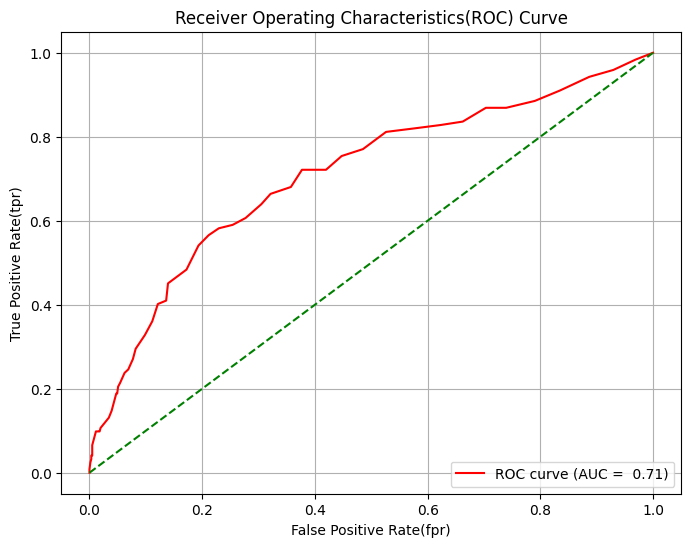

In [50]:
#plotting

plt.figure(figsize = (8, 6))
plt.plot(true_pr, false_pr, color = 'red', label = f"ROC curve (AUC = {roc_auc: .2f})")
plt.plot([0, 1], [0, 1], color = 'green', linestyle = '--')
plt.xlabel('False Positive Rate(fpr)')
plt.ylabel('True Positive Rate(tpr)')
plt.title('Receiver Operating Characteristics(ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()